In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import datetime

from pathlib import Path
from run_analysis import postprocess, preprocess

sns.set_theme(style='darkgrid')

In [2]:
# eraDf = pd.read_csv(os.path.join('Analysis', 'low_fluct_condition', 'eraDf.csv'))
# remsDf = pd.read_csv(os.path.join('Analysis', 'low_fluct_condition', 'remsDf.csv'))
# outDf = pd.read_csv(os.path.join('Analysis', 'low_fluct_condition', 'outDf.csv'))
eraDf = pd.read_csv(os.path.join('Analysis', 'correct', 'eraDf.csv'))
remsDf = pd.read_csv(os.path.join('Analysis', 'correct', 'remsDf.csv'))
outDf = pd.read_csv(os.path.join('Analysis', 'correct', 'outDf.csv'))

remsDf.timemet = remsDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
eraDf.timemet = eraDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
outDf.time = outDf.time.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [21]:
print(outDf.time.min())
print(outDf.time.max())

era_only = True

time_lim = [datetime.datetime.strptime("2015-04-20 01:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-20 06:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = [datetime.datetime.strptime("2015-04-06 00:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-23 23:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = [datetime.datetime.strptime("2015-04-18 00:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-28 23:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = None

2015-04-01 00:00:00
2015-04-30 23:40:00


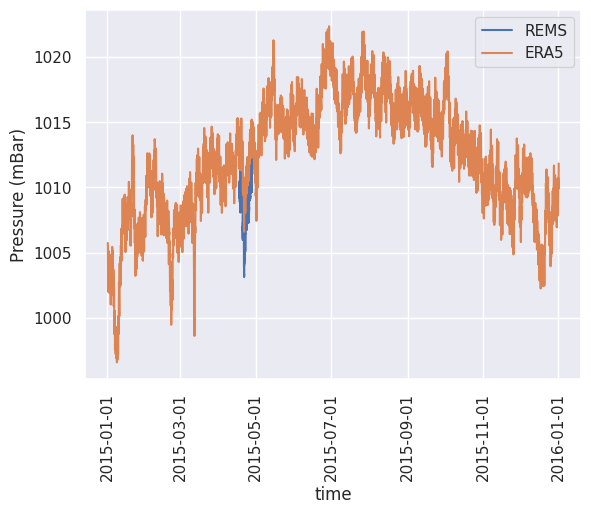

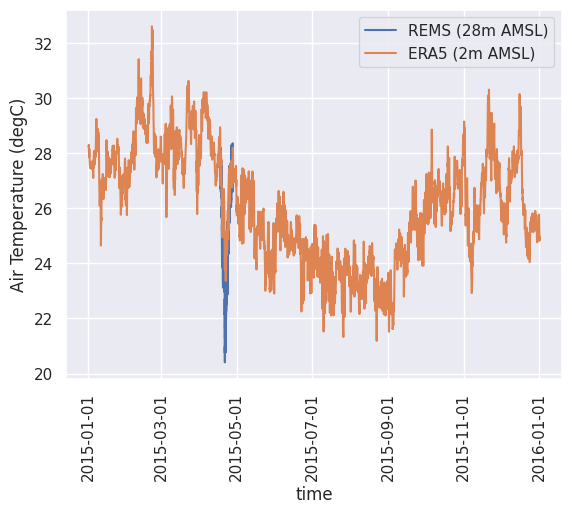

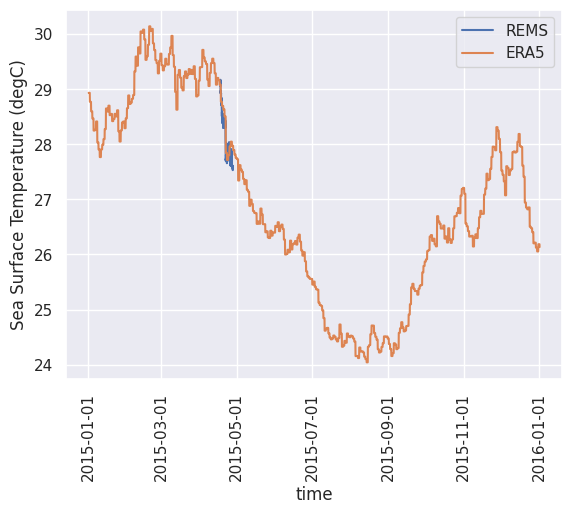

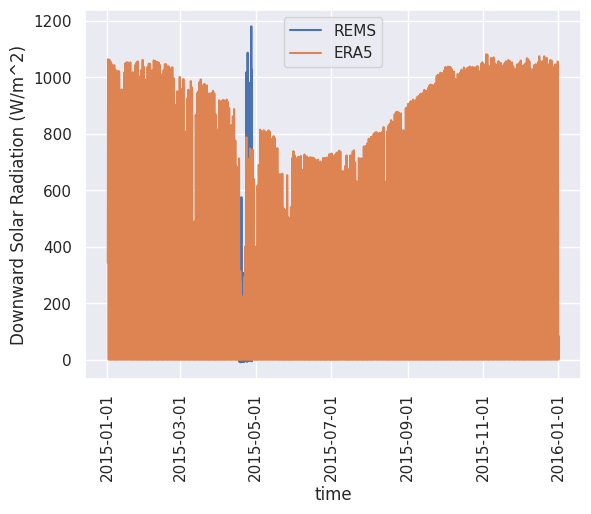

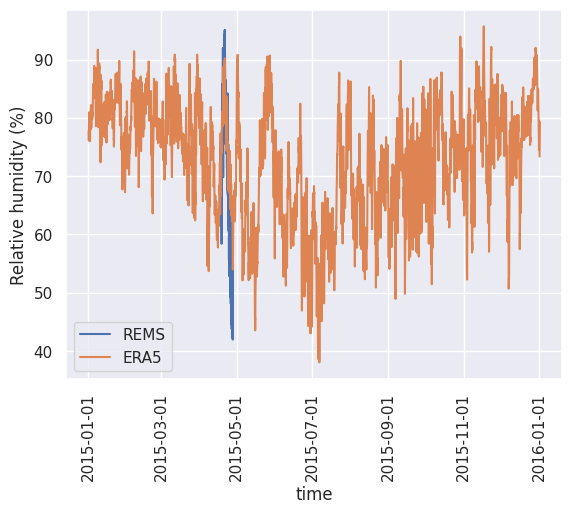

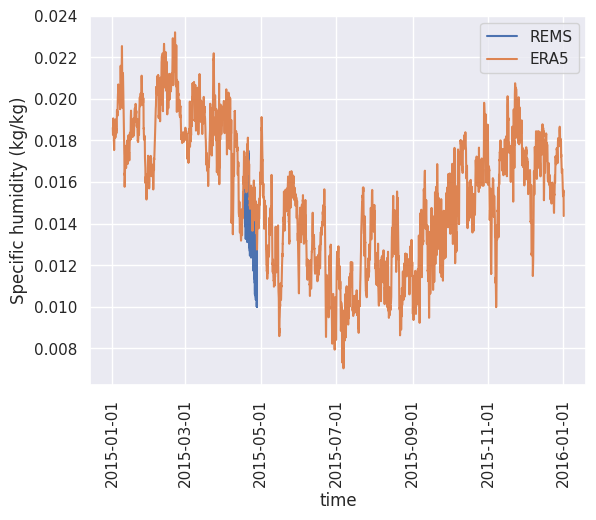

In [17]:
preprocess(eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

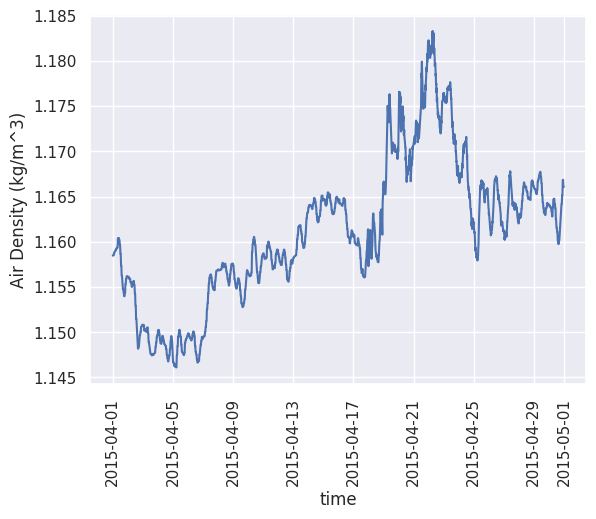

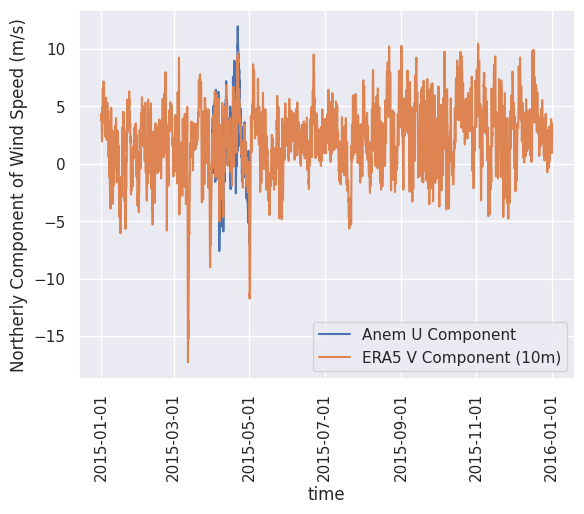

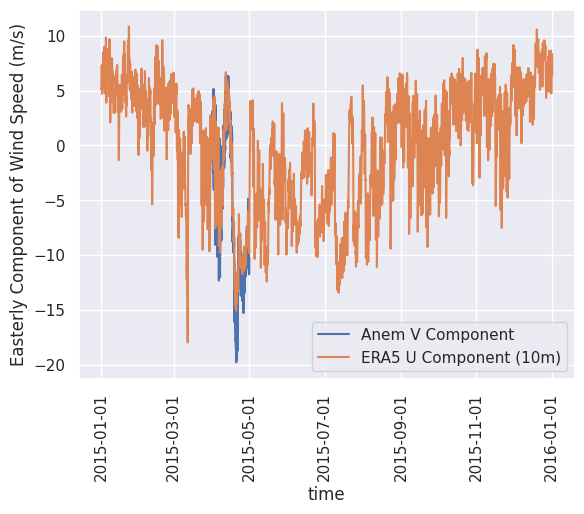

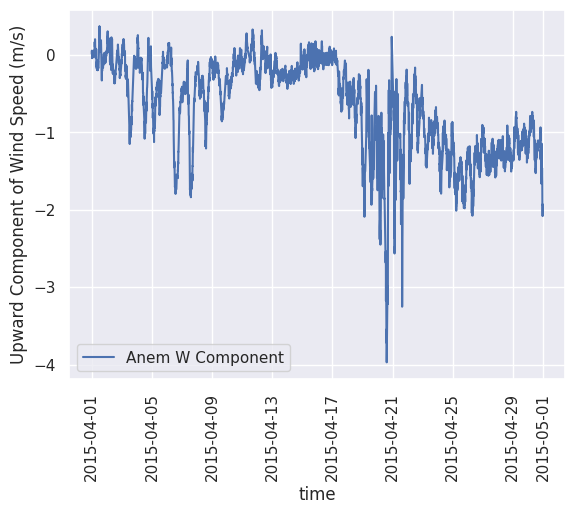

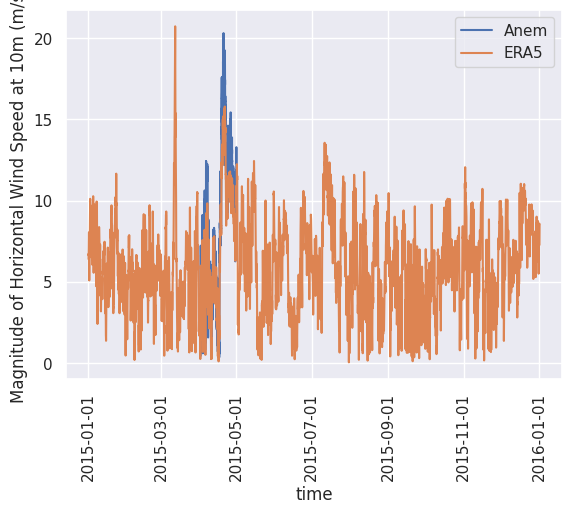

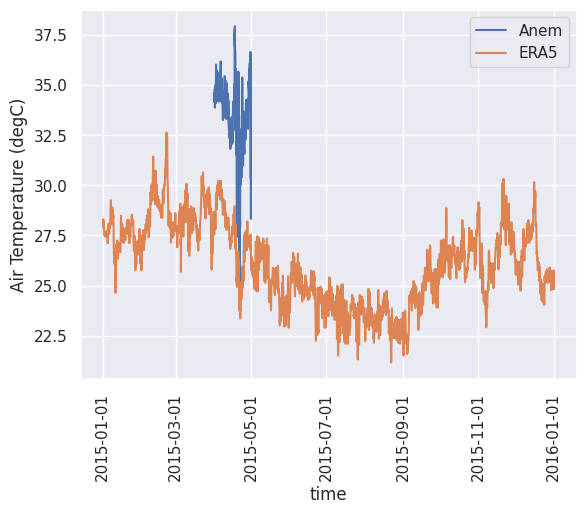

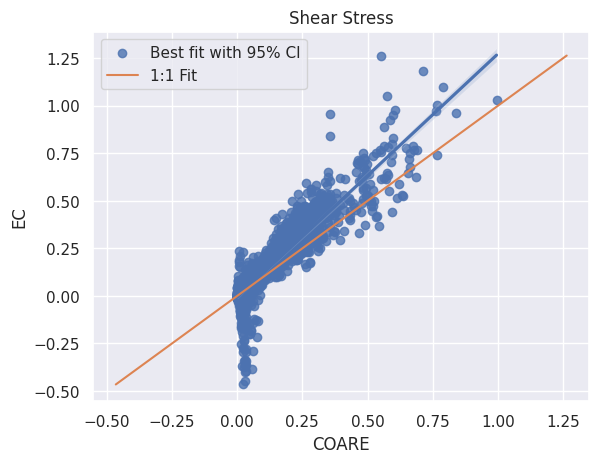

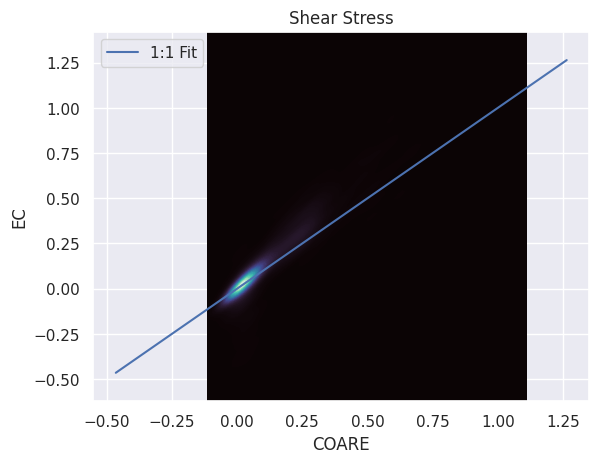

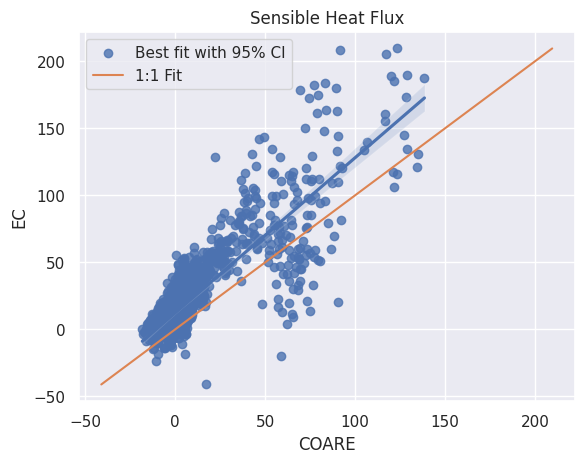

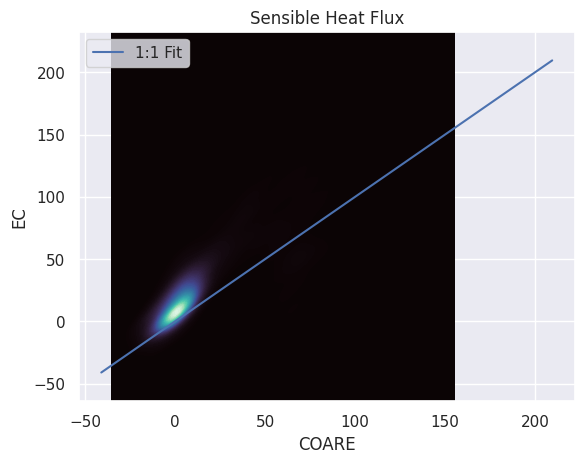

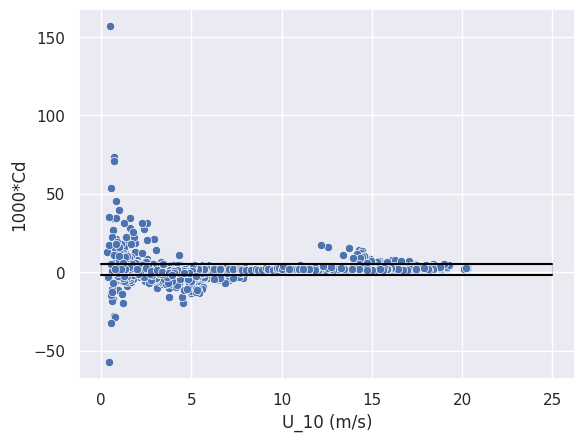

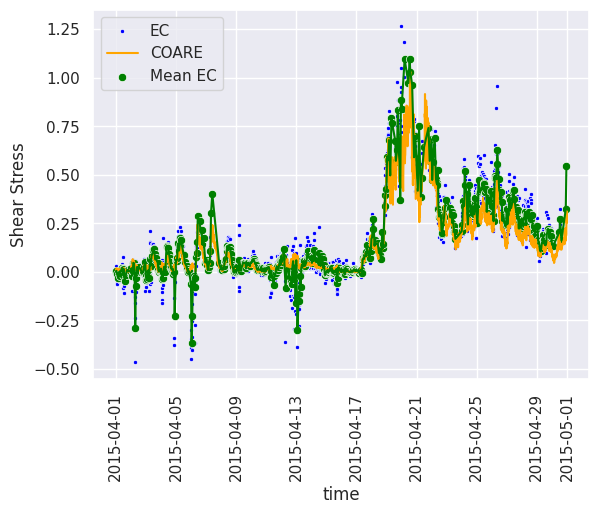

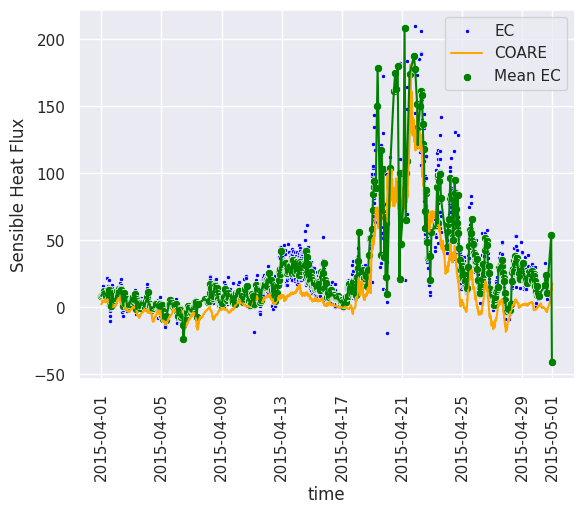

In [22]:
postprocess(outDf, eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

<AxesSubplot: xlabel='time', ylabel='HApprox'>

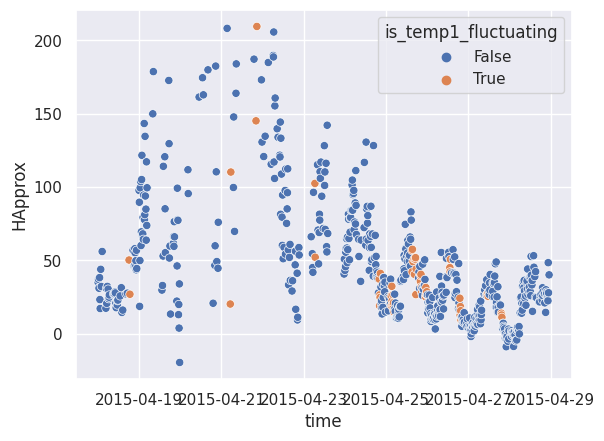

In [8]:
# sns.scatterplot(data=outDf, x='time', y='HApprox', hue='is_temp1_fluctuating')
sns.scatterplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', hue='is_temp1_fluctuating')

<AxesSubplot: xlabel='time', ylabel='HApprox'>

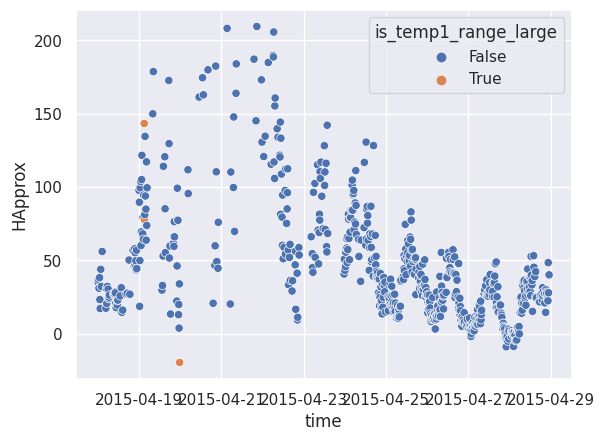

In [9]:
#sns.lineplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', linewidth=0.5)
sns.scatterplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', hue='is_temp1_range_large')

<AxesSubplot: xlabel='time', ylabel='HApprox'>

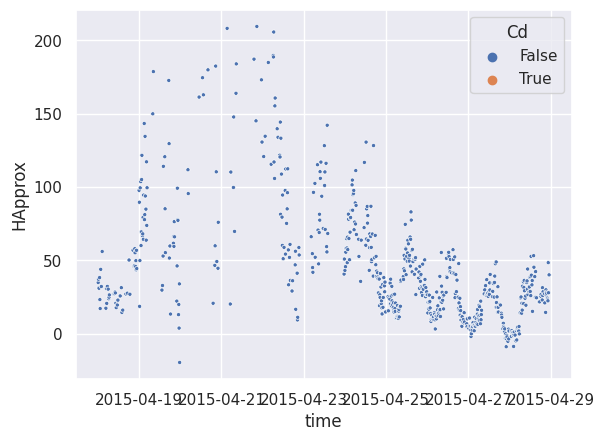

In [10]:
sns.scatterplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', hue=(1000*outDf.Cd >= 5), marker='.')

In [11]:
# NO MRU CORRECTION

eraDf_nocorrect = pd.read_csv(os.path.join('Analysis', 'no_correct', 'eraDf.csv'))
remsDf_nocorrect = pd.read_csv(os.path.join('Analysis', 'no_correct', 'remsDf.csv'))
outDf_nocorrect = pd.read_csv(os.path.join('Analysis', 'no_correct', 'outDf.csv'))

remsDf_nocorrect.timemet = remsDf_nocorrect.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
eraDf_nocorrect.timemet = eraDf_nocorrect.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
outDf_nocorrect.time = outDf_nocorrect.time.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [12]:
era_only = True

time_lim = [datetime.datetime.strptime("2015-04-20 01:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-20 06:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = [datetime.datetime.strptime("2015-04-06 00:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-23 23:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = [datetime.datetime.strptime("2015-04-18 00:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-28 23:00:00", '%Y-%m-%d %H:%M:%S')]
# time_lim = None

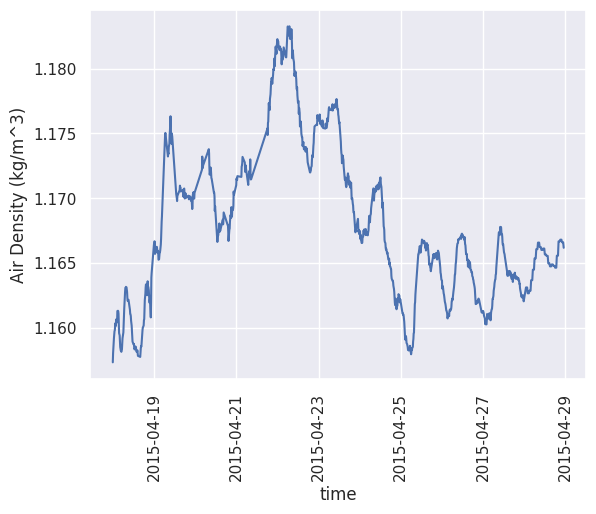

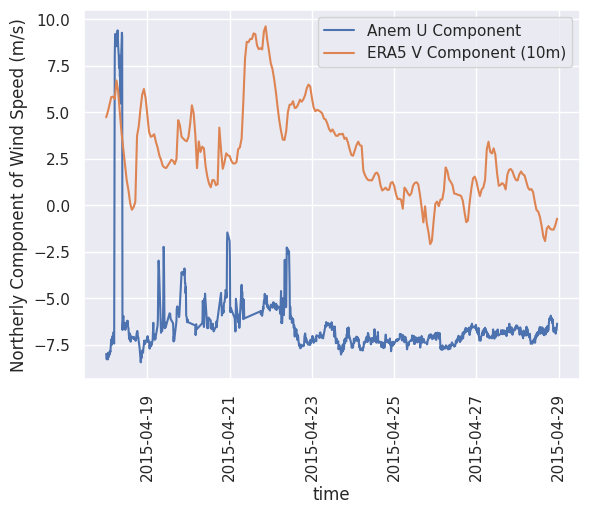

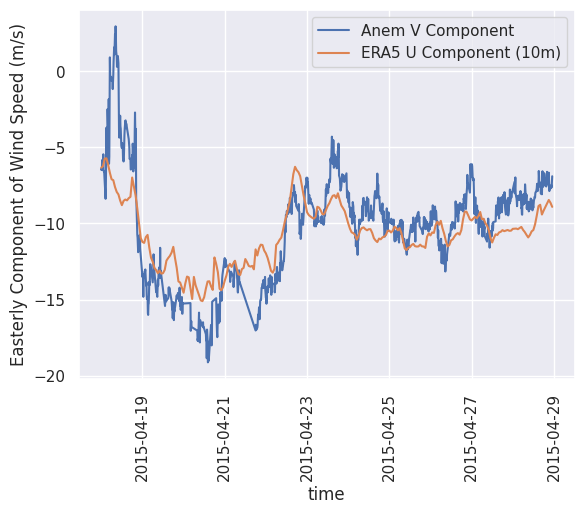

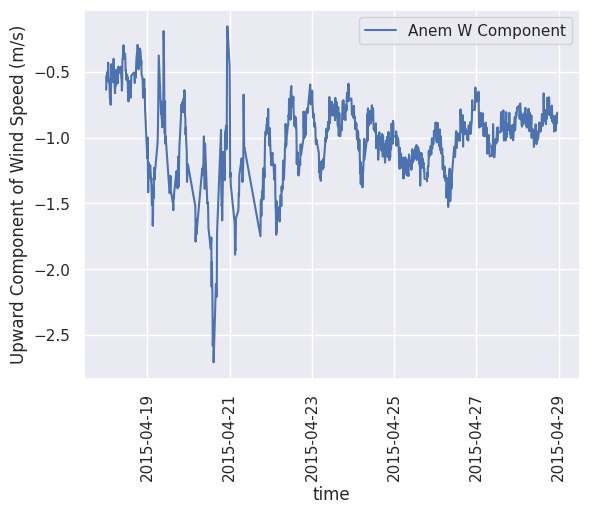

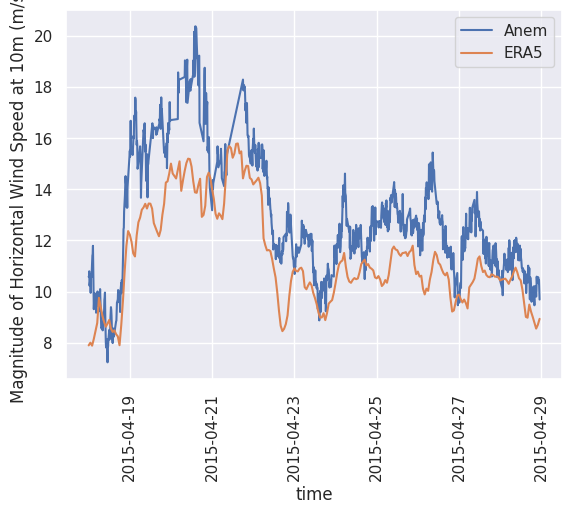

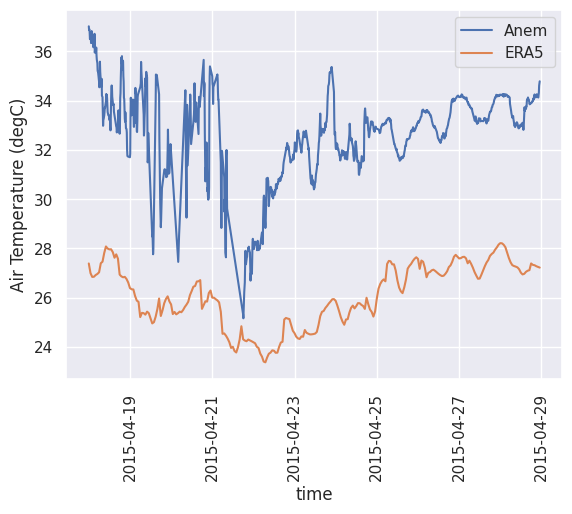

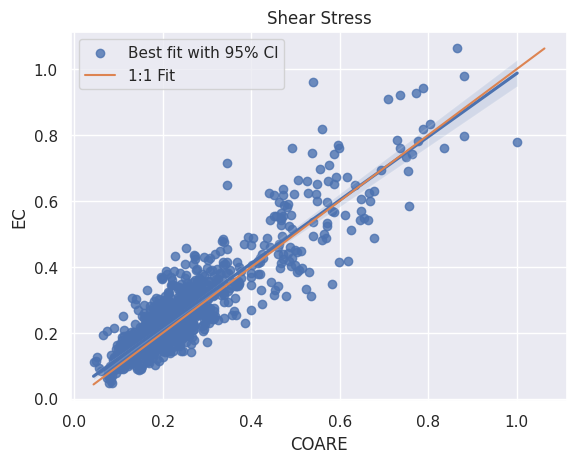

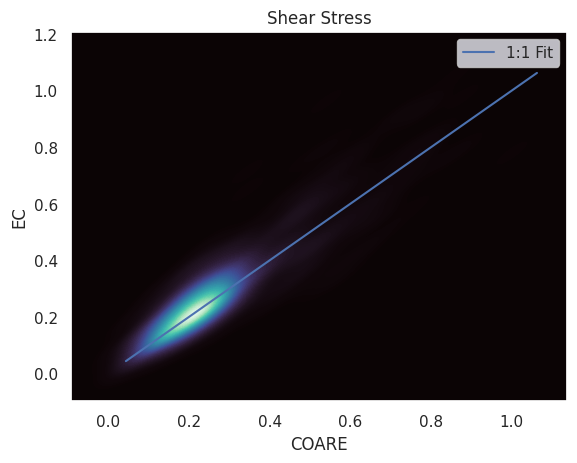

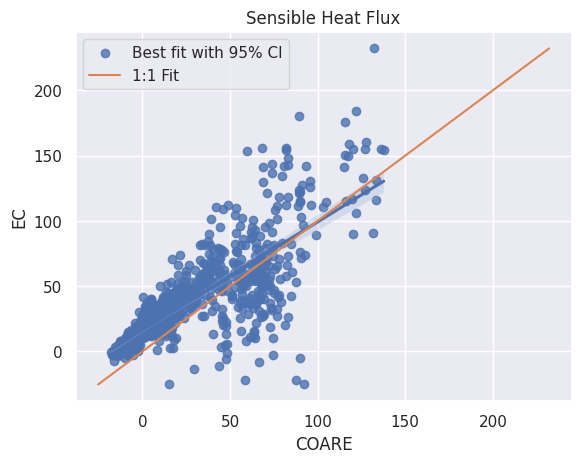

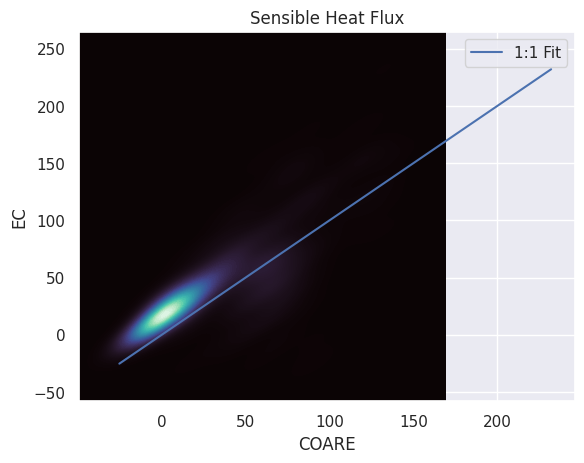

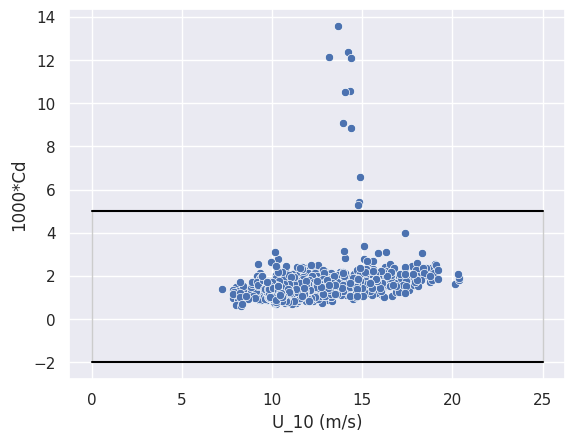

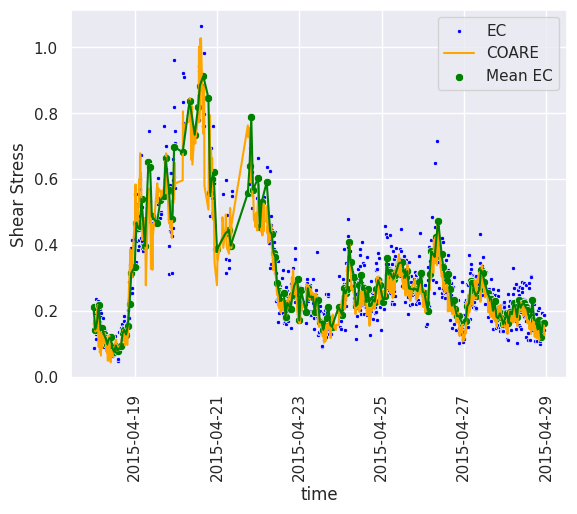

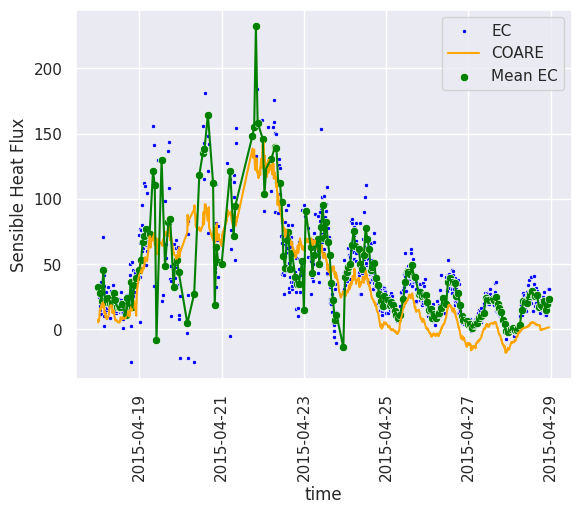

In [13]:
postprocess(outDf_nocorrect, eraDf_nocorrect, remsDf_nocorrect, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

<AxesSubplot: xlabel='time', ylabel='HApprox'>

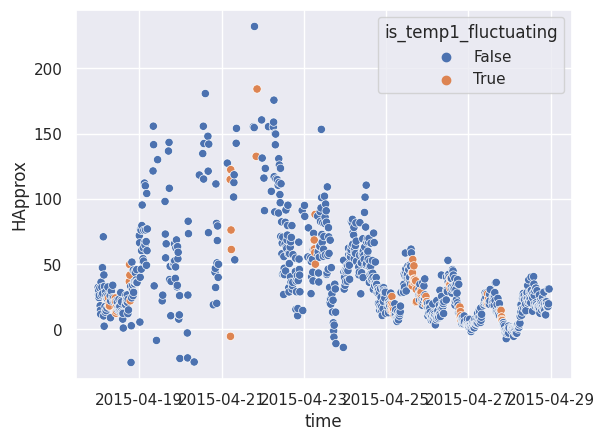

In [41]:
sns.scatterplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', hue='is_temp1_fluctuating')

<AxesSubplot: xlabel='time', ylabel='HApprox'>

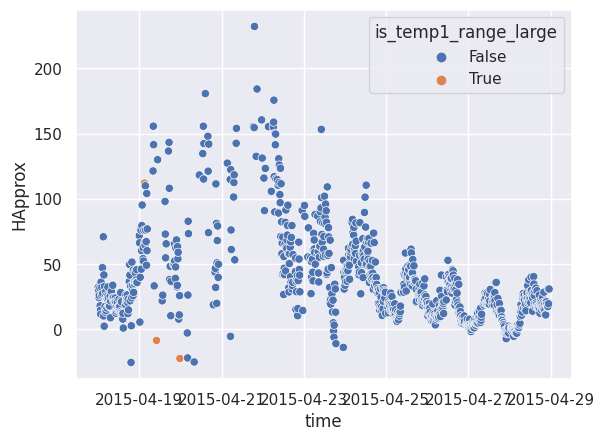

In [63]:
#sns.lineplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', linewidth=0.5)
sns.scatterplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', hue='is_temp1_range_large')

<AxesSubplot: xlabel='time', ylabel='HApprox'>

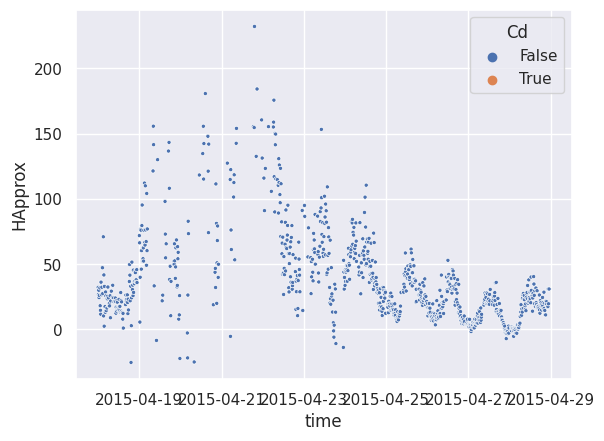

In [44]:
sns.scatterplot(data=outDf[(outDf.time >= time_lim[0]) & (outDf.time <= time_lim[1])], x='time', y='HApprox', hue=(1000*outDf.Cd >= 5), marker='.')

In [14]:
sns.regplot(x=outDf_nocorrect.HApprox, y=outDf.HApprox)
plt.xlabel('Uncorrected')
plt.ylabel('MRU Corrected')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3019 and the array at index 1 has size 3119

In [49]:
scores = pd.DataFrame({'atar': [85, 90, 95, 98, 99.95], 'sat': [1210, 1270, 1370, 1440, 1590]})
m, c = np.polyfit(x=scores.atar, y=scores.sat, deg=1)
a, b, c = np.polyfit(x=scores.atar, y=scores.sat, deg=2)

x_lin = np.linspace(85, 99.95, 10)
y_lin = a*x_lin**2 + b*x_lin + c#m*x_lin + c
print(a*99.95**2 + b*99.95 + c)

1564.1802478464433


<AxesSubplot: xlabel='atar', ylabel='sat'>

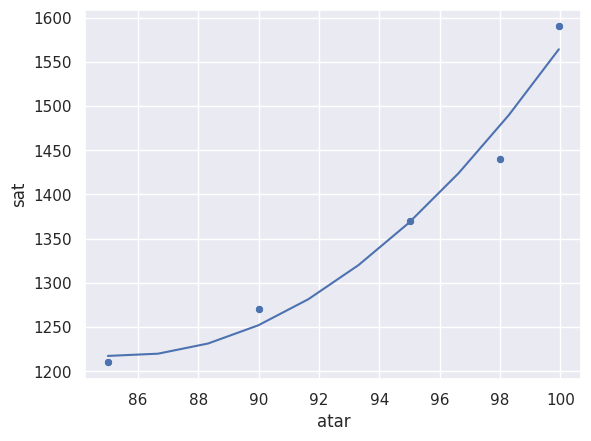

In [50]:
sns.scatterplot(data=scores, x='atar', y='sat')
sns.lineplot(x=x_lin, y=y_lin)